<a href="https://colab.research.google.com/github/Nagano11/Fraud_detection/blob/main/Fraud_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud detection analysis and prediction model test

## Introduction

This dataset is loaded from Kaggle (link below). And the code below was executed while doing a class in Alura's online platform for Machine Learning courses.

The columns summary is as per below:

step - unit of time (1 hour)

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - transaction amount in local currency.

nameOrig - transaction originator

oldbalanceOrg - initial balance (before transaction)

newbalanceOrig - new balance (after transaction)

nameDest - transaction recipient

oldbalanceDest - initial balance before transaction.

newbalanceDest - new balance after transaction.

isFraud - Fraud agent takes control of customers accounts and attempts to empty it by transferring to another account and then cashing out.

isFlaggedFraud - An illegal attempt to transfer massive amount of money in a single transaction.




Link:

Dataset - https://www.kaggle.com/datasets/gopalmahadevan/fraud-detection-example

Alura - https://www.alura.com.br/

## Installing and import of libraries

In [2]:
pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 24.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f5bf22ba4981bfc5c8d6bd0843332b7b6a8ab701aac2fd27a327d0a2a07704eb
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ydata_profiling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pandas.core.indexes.interval import InvalidIndexError
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

## Loading and processing the dataset

In [4]:
data = pd.read_csv('fraud_dataset_example.csv')

In [5]:
data.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

### Reordering the columns

In [6]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
data = data[['isFraud',
       'isFlaggedFraud', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]

data.head()

isFraud  isFlaggedFraud  step      type    amount     nameOrig  \
0        0               0     1   PAYMENT   9839.64  C1231006815   
1        0               0     1   PAYMENT   1864.28  C1666544295   
2        1               0     1  TRANSFER    181.00  C1305486145   
3        1               0     1  CASH_OUT    181.00   C840083671   
4        0               0     1   PAYMENT  11668.14  C2048537720   

   oldbalanceOrg  newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  
0       170136.0       160296.36  M1979787155             0.0             0.0  
1        21249.0        19384.72  M2044282225             0.0             0.0  
2          181.0            0.00   C553264065             0.0             0.0  
3          181.0            0.00    C38997010         21182.0             0.0  
4        41554.0        29885.86  M1230701703             0.0             0.0

### Exploratory analysis

In [8]:
data.describe().T

count          mean           std   min       25%  \
isFraud         101613.0  1.141586e-03  3.376824e-02  0.00      0.00   
isFlaggedFraud  101613.0  0.000000e+00  0.000000e+00  0.00      0.00   
step            101613.0  8.523457e+00  1.820681e+00  1.00      8.00   
amount          101613.0  1.740901e+05  3.450199e+05  0.32  10016.59   
oldbalanceOrg   101613.0  9.071753e+05  2.829575e+06  0.00      0.00   
newbalanceOrig  101613.0  9.234992e+05  2.867319e+06  0.00      0.00   
oldbalanceDest  101613.0  8.810428e+05  2.399949e+06  0.00      0.00   
newbalanceDest  101613.0  1.183998e+06  2.797761e+06  0.00      0.00   

                     50%         75%          max  
isFraud             0.00        0.00         1.00  
isFlaggedFraud      0.00        0.00         0.00  
step                9.00       10.00        10.00  
amount          53385.41   212498.40  10000000.00  
oldbalanceOrg   20190.47   194715.00  38939424.03  
newbalanceOrig      0.00   219217.76  38946233.02  
oldbalanceDest  21058.00   591921.70  34008736.98  
newbalanceDest  51783.43  1063121.64  38946233.02

In [9]:
data.shape

(101613, 11)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   isFraud         101613 non-null  int64  
 1   isFlaggedFraud  101613 non-null  int64  
 2   step            101613 non-null  int64  
 3   type            101613 non-null  object 
 4   amount          101613 non-null  float64
 5   nameOrig        101613 non-null  object 
 6   oldbalanceOrg   101613 non-null  float64
 7   newbalanceOrig  101613 non-null  float64
 8   nameDest        101613 non-null  object 
 9   oldbalanceDest  101613 non-null  float64
 10  newbalanceDest  101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [11]:
data.groupby('step').isFraud.count()

step
1      2708
2      1014
3       552
4       565
5       665
6      1660
7      6837
8     21097
9     37628
10    28887
Name: isFraud, dtype: int64

The data presents very unbalanced quantity of Fraud confirmation.

### Data processing

In [12]:
data.dropna(inplace=True)

In [13]:
data.isnull().values.any()

False

In [14]:
ydata_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- "type" columns is categorical, so we will apply One-Hot Encoding to it.

- "isFlaggedFraud" column only has '0' values so we should delete it from dataset.

- "nameOrig" and "nameDest" doesn't have any relevance to the ML model, so it will be excluded from dataset.


#### One-Hot Encoding the "type" column

In [15]:
data = pd.get_dummies(data=data, columns=['type'])
data.head()

isFraud  isFlaggedFraud  step    amount     nameOrig  oldbalanceOrg  \
0        0               0     1   9839.64  C1231006815       170136.0   
1        0               0     1   1864.28  C1666544295        21249.0   
2        1               0     1    181.00  C1305486145          181.0   
3        1               0     1    181.00   C840083671          181.0   
4        0               0     1  11668.14  C2048537720        41554.0   

   newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  type_CASH_IN  \
0       160296.36  M1979787155             0.0             0.0             0   
1        19384.72  M2044282225             0.0             0.0             0   
2            0.00   C553264065             0.0             0.0             0   
3            0.00    C38997010         21182.0             0.0             0   
4        29885.86  M1230701703             0.0             0.0             0   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0              0           0             1              0  
1              0           0             1              0  
2              0           0             0              1  
3              1           0             0              0  
4              0           0             1              0

In [16]:
data.drop(columns=['isFlaggedFraud', 'nameOrig', 'nameDest'], inplace=True)
data.head()

isFraud  step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0        0     1   9839.64       170136.0       160296.36             0.0   
1        0     1   1864.28        21249.0        19384.72             0.0   
2        1     1    181.00          181.0            0.00             0.0   
3        1     1    181.00          181.0            0.00         21182.0   
4        0     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  \
0             0.0             0              0           0             1   
1             0.0             0              0           0             1   
2             0.0             0              0           0             0   
3             0.0             0              1           0             0   
4             0.0             0              0           0             1   

   type_TRANSFER  
0              0  
1              0  
2              1  
3              0  
4              0

## Machine Learning prediction models testing and analysis

### Logistic Regression (1st trial)

In [17]:
X = data.drop(columns='isFraud')

In [18]:
y = data.isFraud

In [19]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [22]:
lr_model = LogisticRegression(max_iter=1000, random_state=SEED)

In [23]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [24]:
y_pred = lr_model.predict(X_test)

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(3))
print("Precision:",metrics.precision_score(y_test, y_pred).round(3))
print("Recall:",metrics.recall_score(y_test, y_pred).round(3))
print("F1:",metrics.f1_score(y_test, y_pred).round(3))

Accuracy: 0.999
Precision: 0.2
Recall: 0.043
F1: 0.071


In [26]:
%matplotlib inline

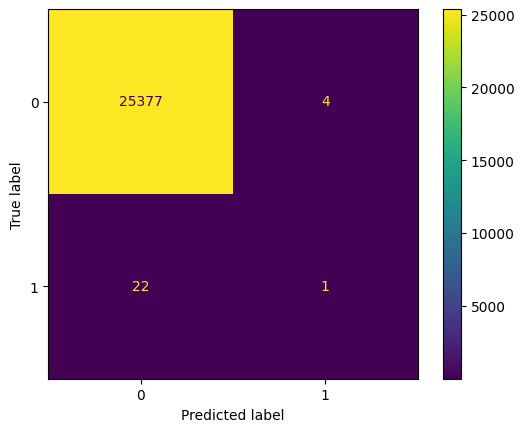

In [27]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

The model presents a high accuracy, but shows very low precision, recall and by consequence, the F1 score is low.
The accuracy is high and recall is low due to the unbalanced data of Fraud detection. As shown in confusion matrix, there only is 1 true positive and 22 false positive against 25,377 true negatives.

In [28]:
y_pred_prob = lr_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)

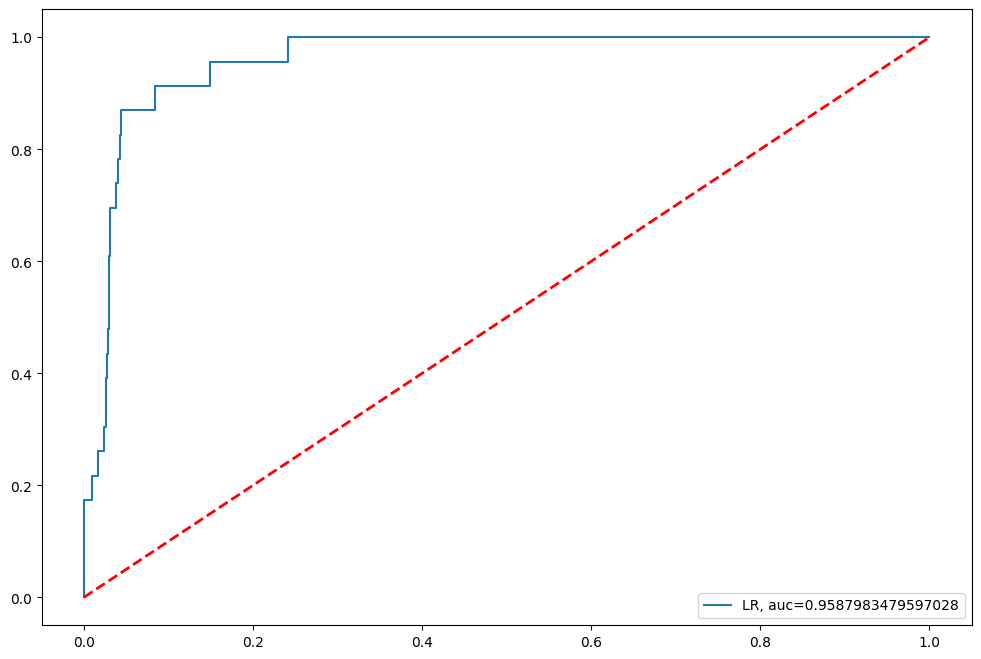

In [29]:
auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label = 'LR, auc='+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

The ROC curve gets 100% of true positive in position 0.2 and 1 in the graph, which is a relativelly good performance.

### Rebalancing the dataset

In [30]:
smote = SMOTE(random_state=SEED)

In [31]:
X = data.drop(columns='isFraud')
y = data.isFraud

In [32]:
X_resample, y_resample = smote.fit_resample(X,y)

In [33]:
data_balanced = pd.concat([y_resample, X_resample], axis=1)
data_balanced

isFraud  step         amount  oldbalanceOrg  newbalanceOrig  \
0             0     1    9839.640000  170136.000000       160296.36   
1             0     1    1864.280000   21249.000000        19384.72   
2             1     1     181.000000     181.000000            0.00   
3             1     1     181.000000     181.000000            0.00   
4             0     1   11668.140000   41554.000000        29885.86   
...         ...   ...            ...            ...             ...   
202989        1     5   17608.962863   17608.962863            0.00   
202990        1     7   12116.291013   12116.291013            0.00   
202991        1     1  231612.880715  231612.880715            0.00   
202992        1     9  547325.144758  547325.144758            0.00   
202993        1     4  159298.594420  159298.594420            0.00   

        oldbalanceDest  newbalanceDest  type_CASH_IN  type_CASH_OUT  \
0             0.000000        0.000000             0              0   
1             0.000000        0.000000             0              0   
2             0.000000        0.000000             0              0   
3         21182.000000        0.000000             0              1   
4             0.000000        0.000000             0              0   
...                ...             ...           ...            ...   
202989        0.000000        0.000000             0              0   
202990        0.000000        0.000000             0              0   
202991     1945.589357     9370.603471             0              0   
202992        0.000000        0.000000             0              0   
202993        0.000000        0.000000             0              0   

        type_DEBIT  type_PAYMENT  type_TRANSFER  
0                0             1              0  
1                0             1              0  
2                0             0              1  
3                0             0              0  
4                0             1              0  
...            ...           ...            ...  
202989           0             0              1  
202990           0             0              1  
202991           0             0              0  
202992           0             0              1  
202993           0             0              1  

[202994 rows x 12 columns]

In [34]:
data_balanced.groupby('isFraud').step.count()

isFraud
0    101497
1    101497
Name: step, dtype: int64

### New Logistic Regression model using a rebalanced dataset

In [35]:
X = data_balanced.drop(columns='isFraud')
y = data_balanced.isFraud
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

lr_model = LogisticRegression(max_iter=1000, random_state=SEED)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(3))
print("Precision:",metrics.precision_score(y_test, y_pred).round(3))
print("Recall:",metrics.recall_score(y_test, y_pred).round(3))
print("F1:",metrics.f1_score(y_test, y_pred).round(3))

Accuracy: 0.942
Precision: 0.924
Recall: 0.962
F1: 0.943


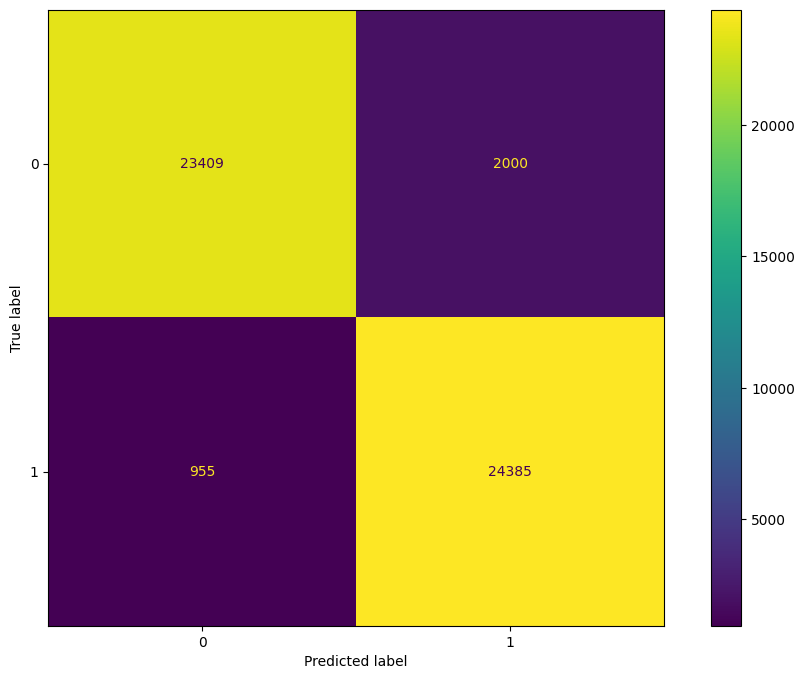

In [36]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

After rebalancing the dataset with SMOTE technique, it has shown a better result in the recall score, compared to the previous model.

The Confusion Matrix now has presented 24385 predictions as true positive for Fraud, being the cause of improvement on recall score.

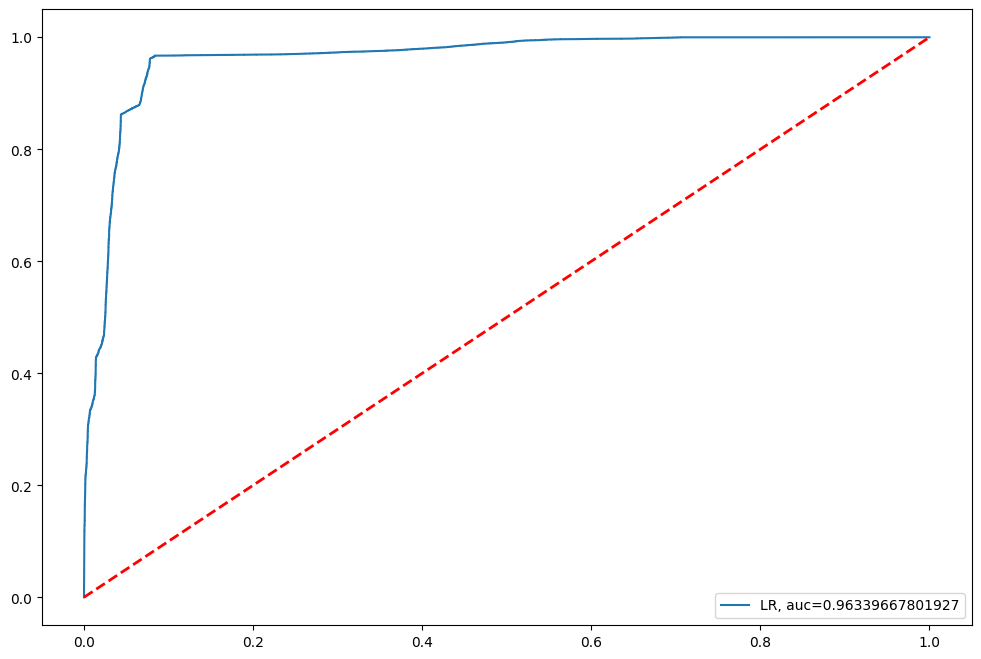

In [37]:
y_pred_prob = lr_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)

auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label = 'LR, auc='+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

The ROC curve is now smoother than the previous model.

In [38]:
ydata_profiling.ProfileReport(data_balanced)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Decision Tree

Testing another ML model.

In [39]:
model_dt = DecisionTreeClassifier(max_depth=5, random_state=SEED)

In [40]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [41]:
y_pred = model_dt.predict(X_test)

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(3))
print("Precision:",metrics.precision_score(y_test, y_pred).round(3))
print("Recall:",metrics.recall_score(y_test, y_pred).round(3))
print("F1:",metrics.f1_score(y_test, y_pred).round(3))

Accuracy: 0.962
Precision: 0.938
Recall: 0.99
F1: 0.963


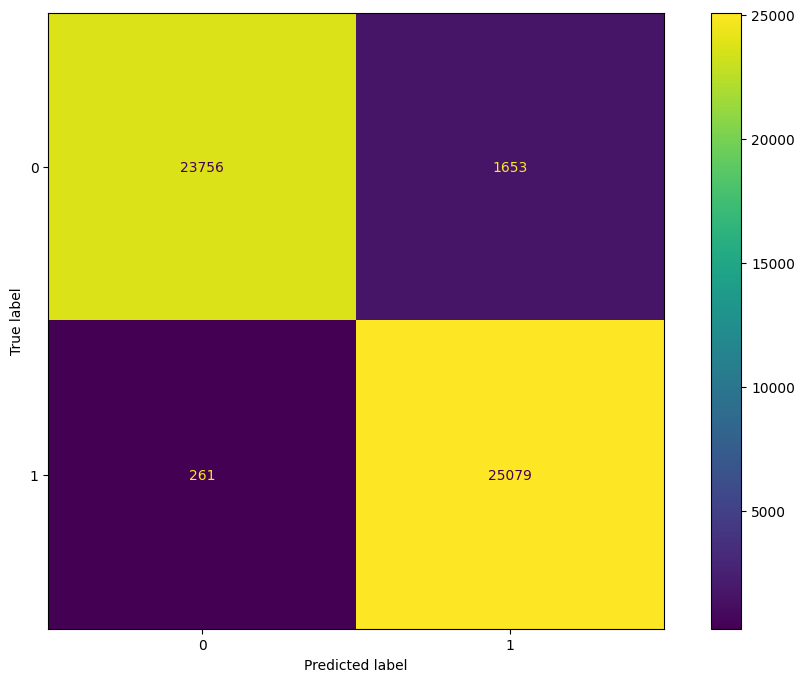

In [43]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

This Decision Tree model improved the recall score compared to Logistic Regression model. Even so, the false negative is still quite high which may not be a good result for a company. So, it should be better to test other models in order to try to improve the results.

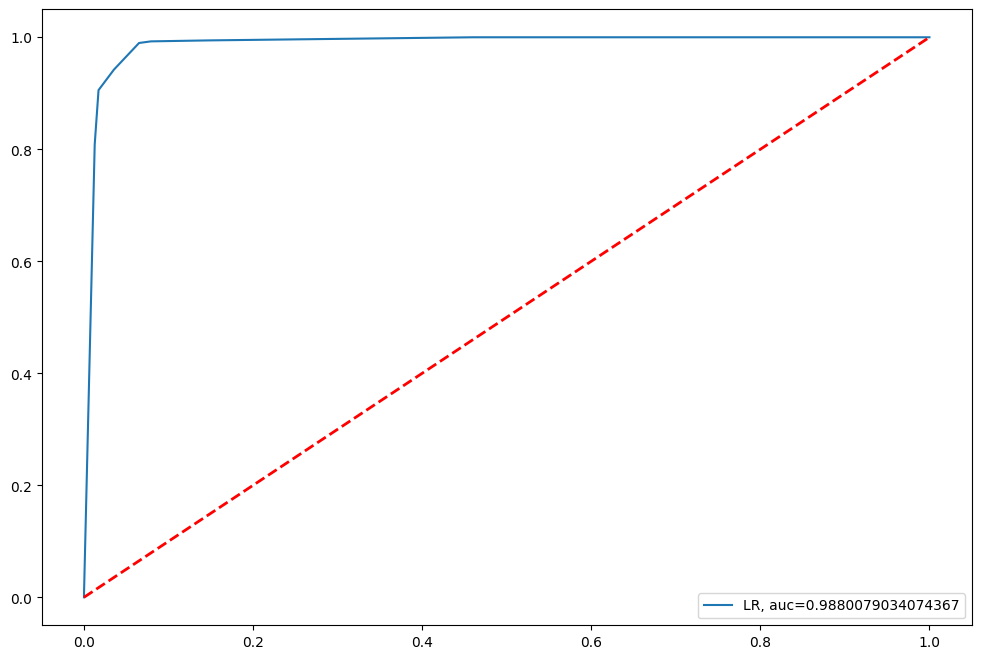

In [44]:
y_pred_prob = model_dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)

auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label = 'LR, auc='+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

Naturally, the ROC curve is smoother compared to Logistic Regression model.

### Random Forest

In [45]:
model_rfc = RandomForestClassifier(max_depth=5, random_state=SEED)
model_rfc.fit(X_train, y_train)

y_pred = model_rfc.predict(X_test)

Accuracy: 0.972
Precision: 0.971
Recall: 0.974
F1: 0.972


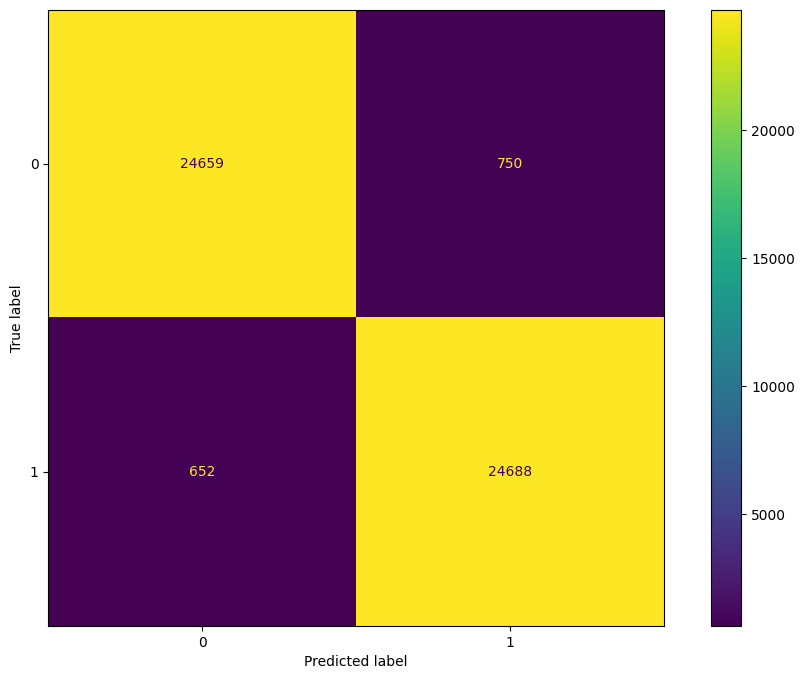

In [46]:
model_rfc = RandomForestClassifier(max_depth=5, random_state=SEED)
model_rfc.fit(X_train, y_train)

y_pred = model_rfc.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(3))
print("Precision:",metrics.precision_score(y_test, y_pred).round(3))
print("Recall:",metrics.recall_score(y_test, y_pred).round(3))
print("F1:",metrics.f1_score(y_test, y_pred).round(3))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

The Random Forest presented a worsening in the recall score, though it has improved in F1 score (i.e. balance between accuracy and recall scores) due to accuracy improvement.

In the Confusion matrix we can see that the false negative improved in more than 50% but false positive worsened in more than doubled. Being that reason of recall score.

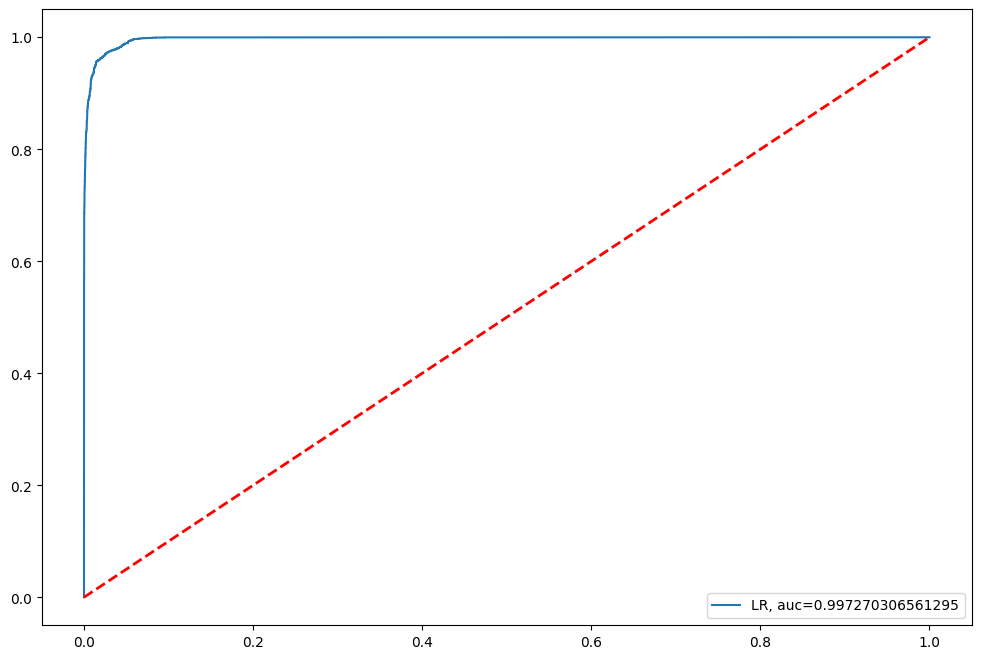

In [49]:
y_pred_prob = model_rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)

auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label = 'LR, auc='+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

Another improvement can be seen in the ROC curve.

## Metrics Analysis

In [50]:
classifiers = [LogisticRegression(max_iter=1000, random_state=SEED),
               DecisionTreeClassifier(max_depth=5, random_state=SEED),
               RandomForestClassifier(max_depth=5, random_state=SEED)]

LogisticRegression
****Results****
Accuracy: 0.942
Precision: 0.924
Recall: 0.962
F1: 0.943
DecisionTreeClassifier
****Results****
Accuracy: 0.962
Precision: 0.938
Recall: 0.99
F1: 0.963
RandomForestClassifier
****Results****
Accuracy: 0.972
Precision: 0.971
Recall: 0.974
F1: 0.972


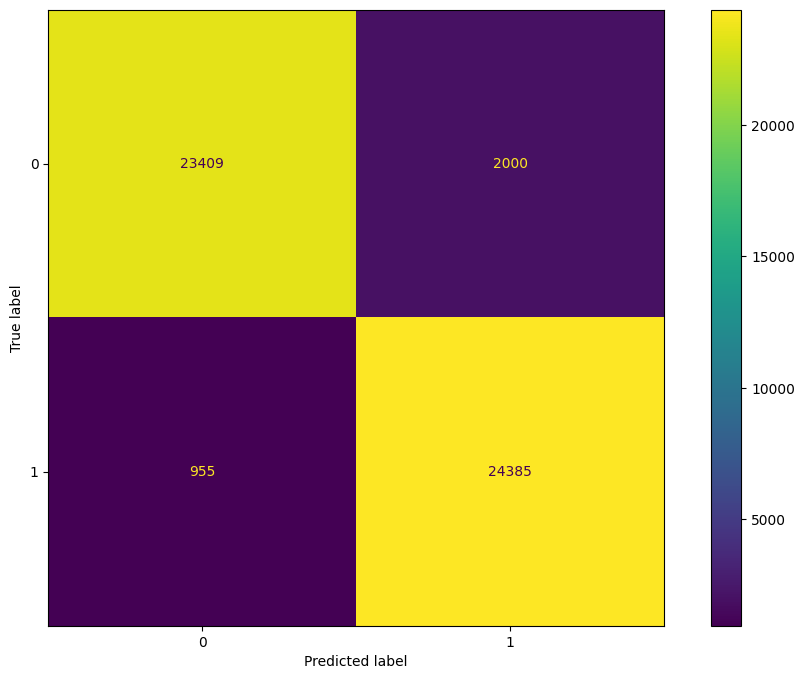

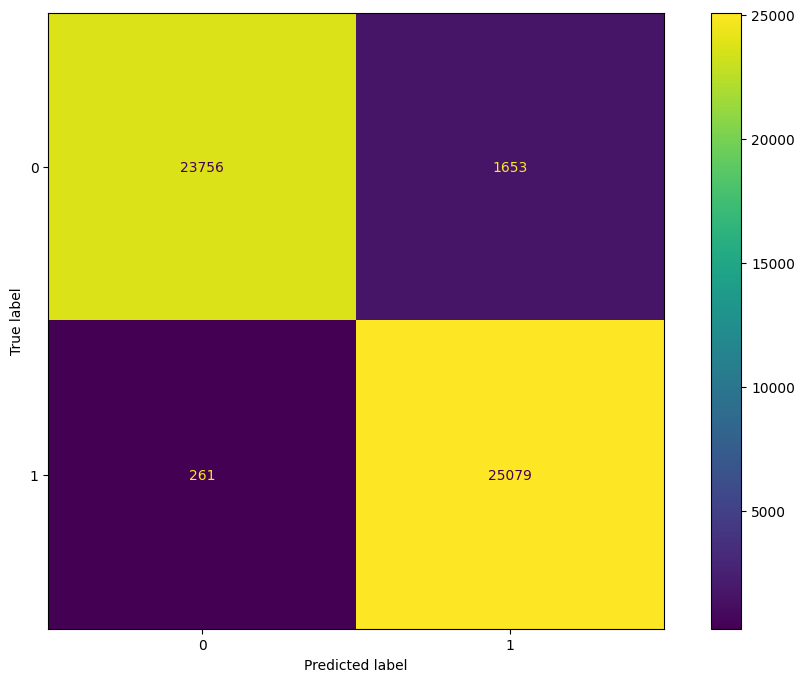

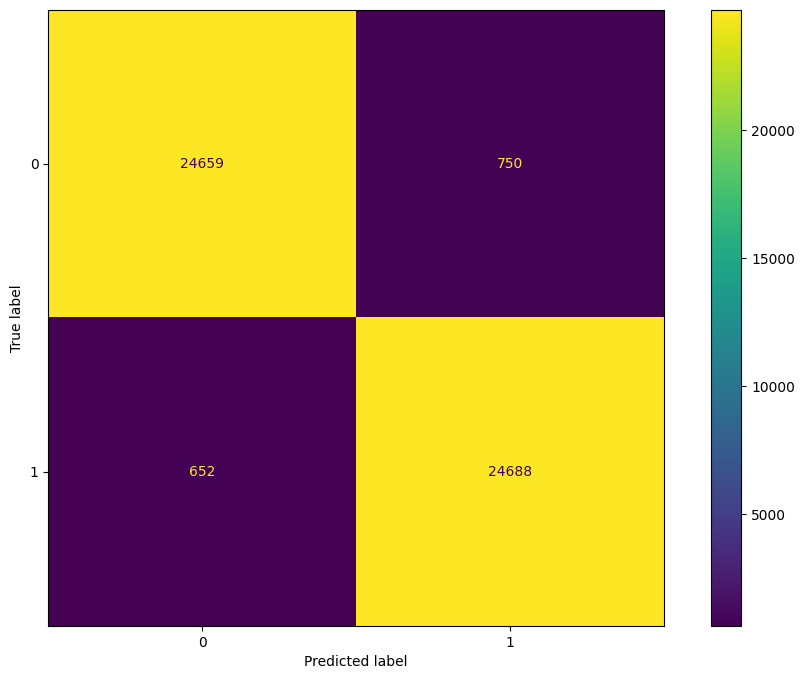

In [51]:
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  name = classifier.__class__.__name__
  print("="*30)
  print(name)
  print('****Results****')
  y_pred = classifier.predict(X_test)
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(3))
  print("Precision:",metrics.precision_score(y_test, y_pred).round(3))
  print("Recall:",metrics.recall_score(y_test, y_pred).round(3))
  print("F1:",metrics.f1_score(y_test, y_pred).round(3))
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()

The  Random Forest has shown a better score balance as well as results in the Confusion Matrix.

## Improving Random Forest Classifier

As the Random Forest showed to be the best model based on the balance Accuracy and Recall scores, now we should try to improve the model with Randomized Search on hyper parameters.

In [52]:
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [53]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [54]:
SEED = 70

model_rforest = RandomForestClassifier(max_depth=5, random_state=SEED)

In [55]:
random_cv = RandomizedSearchCV(model_rforest, param_grid, n_iter=5, cv=3, scoring='recall', n_jobs=-1, random_state=SEED)

In [56]:
%%time
rcv = random_cv.fit(X, y)

CPU times: user 27.4 s, sys: 444 ms, total: 27.8 s
Wall time: 3min 8s


In [57]:
pd.DataFrame(rcv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      35.759716      2.968638         1.093901        0.251536   
1      12.478395      0.076780         0.583264        0.013599   
2      12.733148      0.374177         0.312586        0.009178   
3      24.775122      2.640889         0.753848        0.039710   
4      17.114481      0.736655         0.955456        0.443110   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                120                       4                      2   
1                120                       4                      2   
2                 40                       8                      1   
3                100                       8                      4   
4                160                       6                      2   

  param_max_features param_max_depth param_criterion param_bootstrap  \
0               auto               9            gini           False   
1               auto               2            gini           False   
2               sqrt               7         entropy           False   
3               log2               9         entropy            True   
4               log2               2            gini           False   

                                              params  split0_test_score  \
0  {'n_estimators': 120, 'min_samples_split': 4, ...           0.991665   
1  {'n_estimators': 120, 'min_samples_split': 4, ...           0.914223   
2  {'n_estimators': 40, 'min_samples_split': 8, '...           0.980285   
3  {'n_estimators': 100, 'min_samples_split': 8, ...           0.993497   
4  {'n_estimators': 160, 'min_samples_split': 6, ...           0.914223   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999438           0.992817         0.994640        0.003425   
1           0.936009           0.862704         0.904312        0.030736   
2           1.000000           0.973812         0.984699        0.011138   
3           0.999025           0.992226         0.994916        0.002951   
4           0.943487           0.876537         0.911416        0.027404   

   rank_test_score  
0                2  
1                5  
2                3  
3                1  
4                4

In [58]:
rcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'entropy',
 'bootstrap': True}

## Final results

In [59]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state=SEED)

In [60]:
rfn.fit(X_train, y_train)
y_pred = rfn.predict(X_test)

Accuracy: 0.992
Precision: 0.991
Recall: 0.993
F1: 0.992


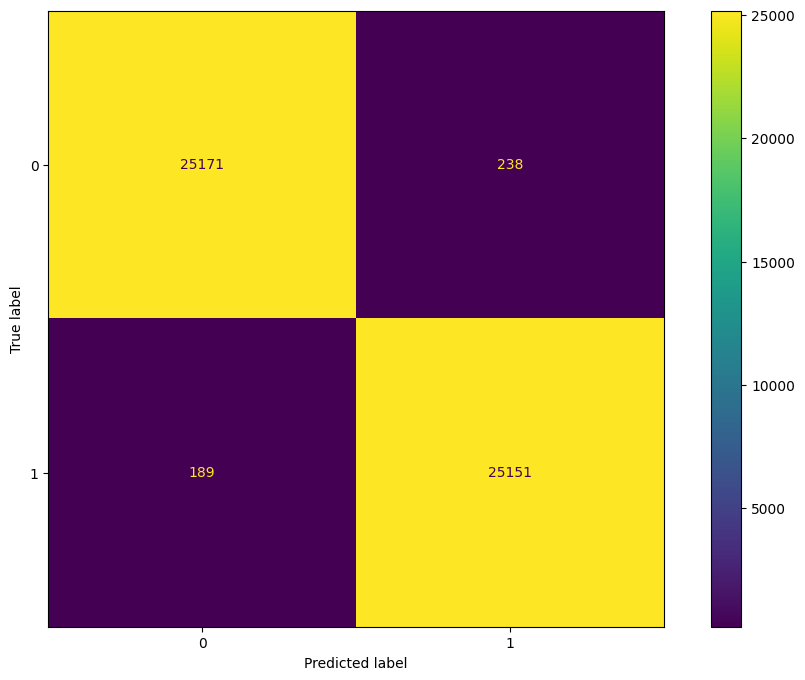

In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(3))
print("Precision:",metrics.precision_score(y_test, y_pred).round(3))
print("Recall:",metrics.recall_score(y_test, y_pred).round(3))
print("F1:",metrics.f1_score(y_test, y_pred).round(3))


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

By using Randomized Search we've achieved to a much bettwe score in Accuracy, Recall and F1. Also, as shown in the Confusion Matrix Above, there were improvements in false positives and negatives.

## Conslusion

After testing some ML models, we've arrived to a conclusion where the Random Forest has shown the best result among other models such as Logisitc Regression and Decision Tree.

After analyzing the dataset, we've come to the following hypothesis:

- Transaction types: Cash in, Payment and transfer are more likely to be fraud.

- The step column seems to have a strong correlation with Fraudulent transactions. This columns doesn't have a clear definition, but by logic if we consider the higher the step, later in the day it is. If our logic is correct, we may consider that late night is more likely to have fraudulent transactions.